### Aim: To predict strategy for increasing the revenue

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
customers = pd.read_csv("FyntraCustomerData.csv")

In [2]:
customers

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [3]:
customers.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### The Model has following Parameters-
* Avg_Session_Length: Average session of in-store style advice sessions.
* Time_on_App: Average time spent on App in minutes
* Time_on_Website: Average time spent on Website in minutes
* Length_of_Membership: How many years the customer has been a member. 
* Yearly_Amount_Spent: The output parameter -- Amount Spend in thousand $ in a year 

### Plotting Amount spent vs time on website

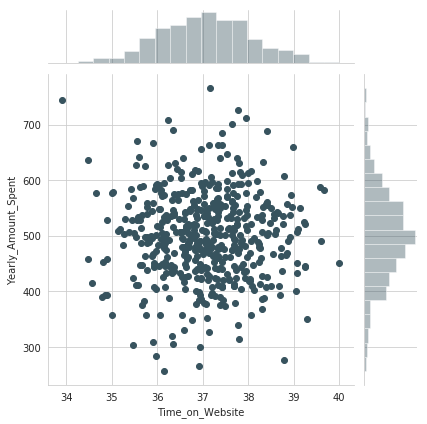

In [6]:
sb.set_palette("GnBu_d")
sb.set_style('whitegrid')
sb.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=customers)

### Plotting Amount spent vs time on app

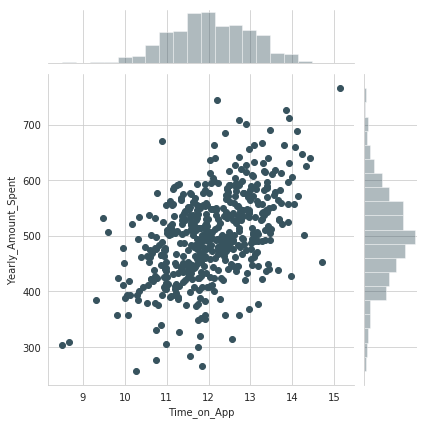

In [7]:
sb.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=customers)

#### It can be inferred that time on app has larger correlation with amount spent compared to time on website

### We can find correlation between every pair of parameters

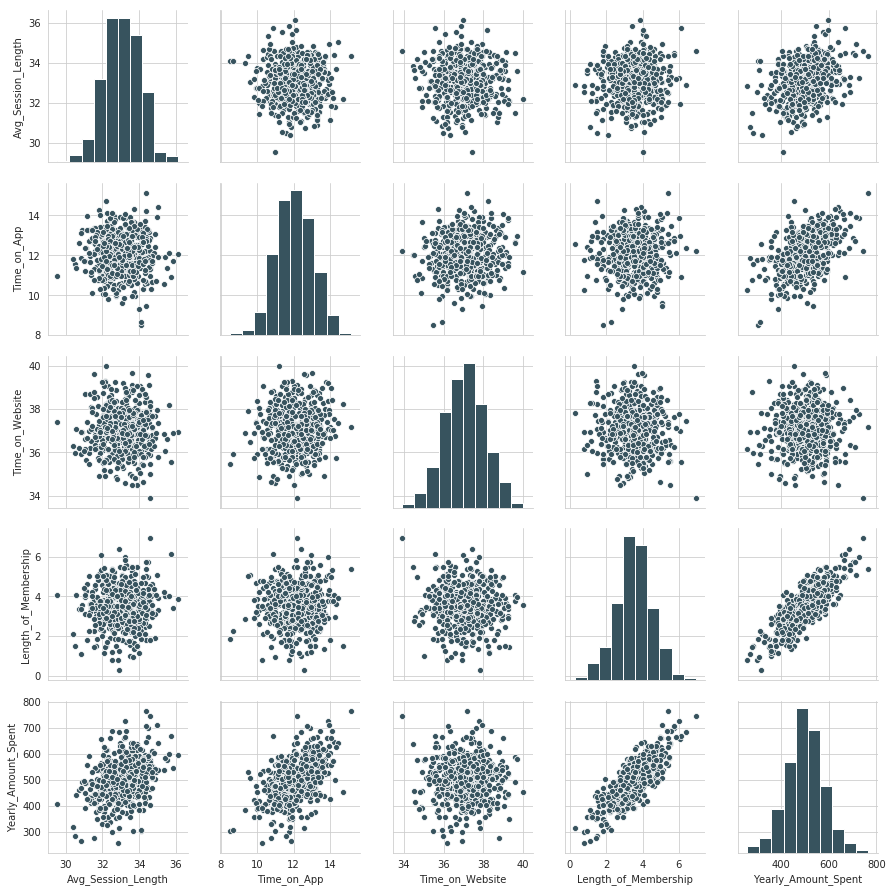

In [8]:
sb.pairplot(customers)

#### Length of membership is the most correlated feature with amount spent

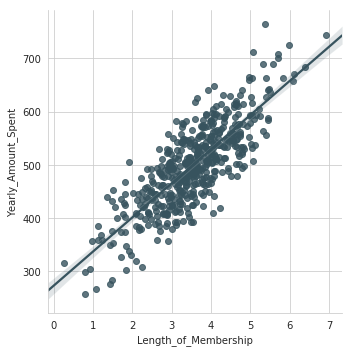

In [11]:
sb.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=customers)

### Building a LR model to predict yearly amount spent based on length of membership

In [17]:
y = customers['Yearly_Amount_Spent'] #response vector
x = customers[['Avg_Session_Length', 'Time_on_App','Time_on_Website', 'Length_of_Membership']] #feature matrix

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [25.53668806 38.8657142   0.4793957  61.52388337]


Text(0, 0.5, 'Predicted Y')

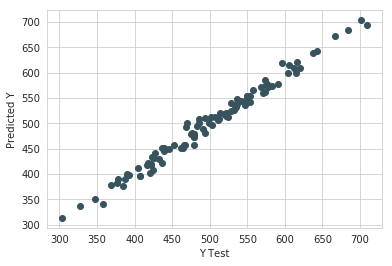

In [21]:
import matplotlib.pyplot as plt
y_preds = lr.predict(x_test)
plt.scatter(y_test,y_preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [25]:
from sklearn import metrics
print('MSE:', round( np.sqrt(metrics.mean_squared_error(y_test, y_preds)),2) )
print('R2:',round(lr.score(x_test,y_test),2))

MSE: 10.12
R2: 0.99


* The coefficient of determination (R^2) is obtained as 0.99
* Mean Squared Error is 10.12

### Interpreting the coefficients

In [29]:
coefficients = pd.DataFrame(lr.coef_,x.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Avg_Session_Length,25.536688
Time_on_App,38.865714
Time_on_Website,0.479396
Length_of_Membership,61.523883


#### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 26.08 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 39.18 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.40 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.41 total dollars spent**.

#### Increase in Length of membership leads to max increase in revenue. The company should provide lucrative offers or discounts on selected items as an incentive for customers to increase the length of membership.

#### It can be seen that Time On App leads to higher revenue conversion – hence company should focus more on App rather than website.